In [149]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
df = pd.read_csv('../data/genres_v2.csv')

C:\Users\danie\AppData\Local\Temp\ipykernel_7660\4047706997.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/genres_v2.csv')


In [133]:
print(df.shape)
print(df.columns)
df.describe()

(42305, 22)
Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [134]:
index_to_drop = ["type", "id", "uri", "track_href", "analysis_url","song_name", "Unnamed: 0", "title"]
df = df.drop(columns=index_to_drop)
print(df.shape)
df.describe()

(42305, 14)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000


In [135]:
df["genre"].value_counts()

genre
Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: count, dtype: int64

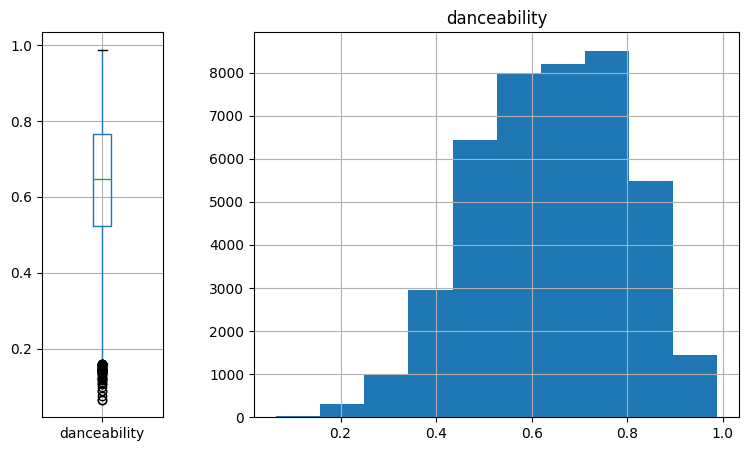

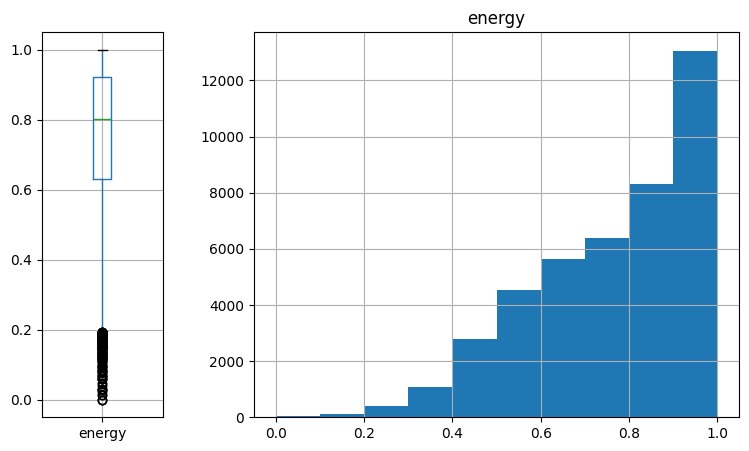

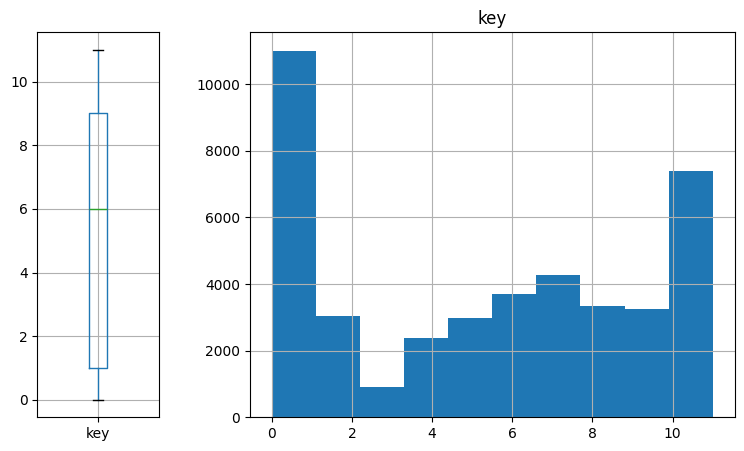

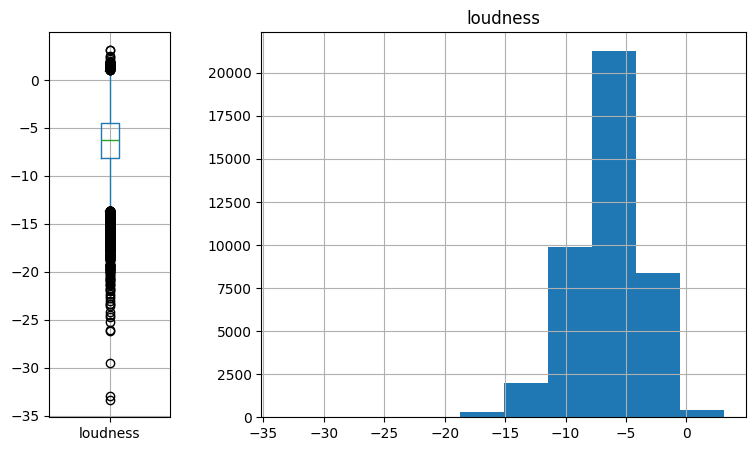

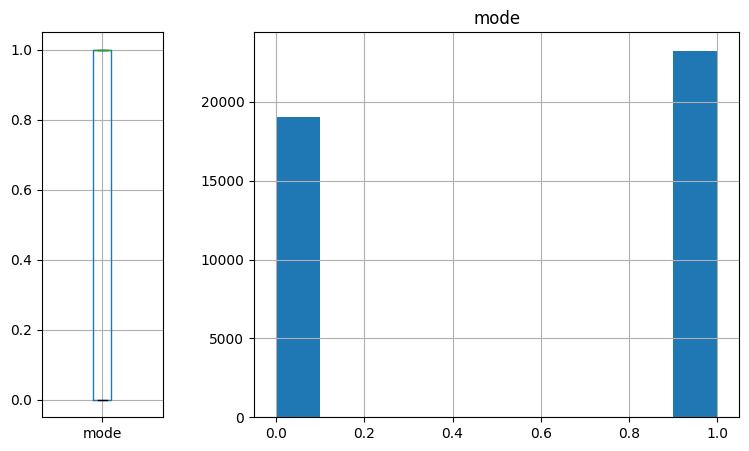

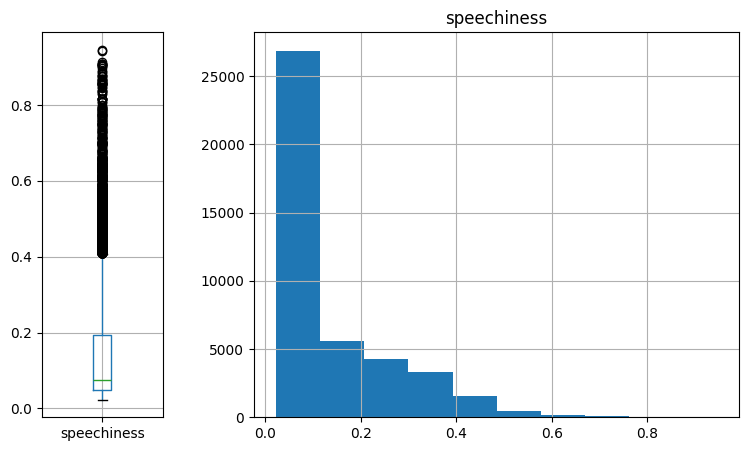

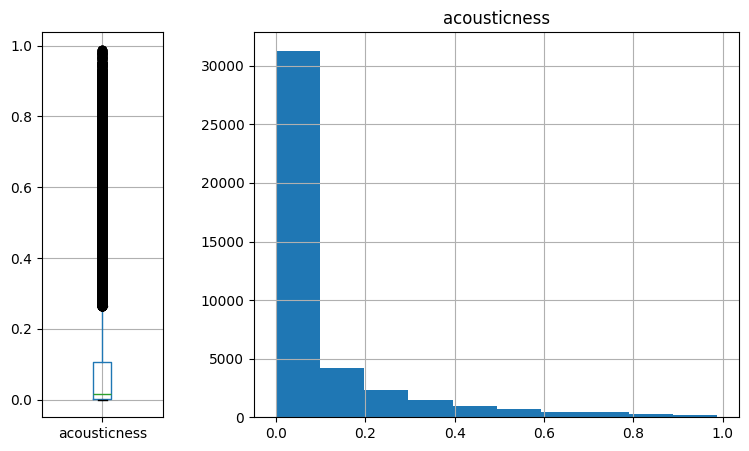

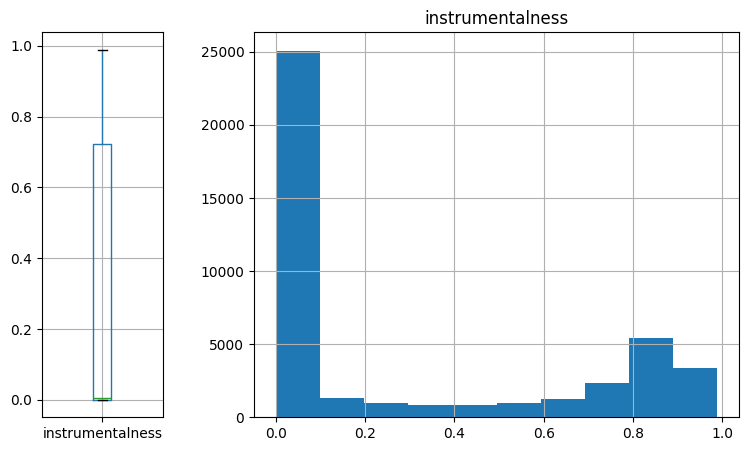

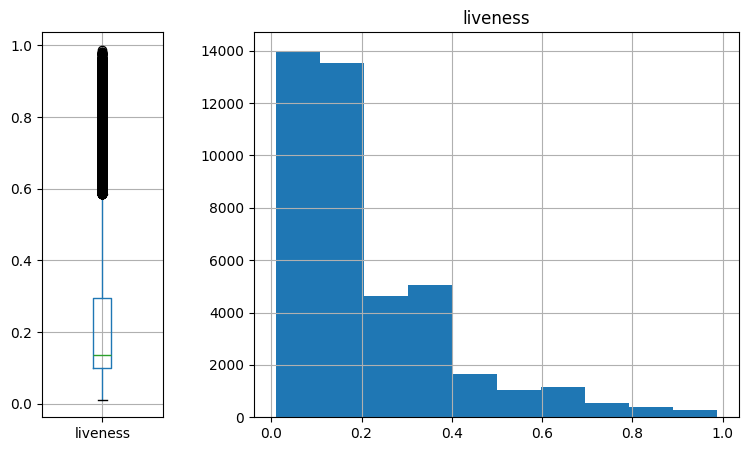

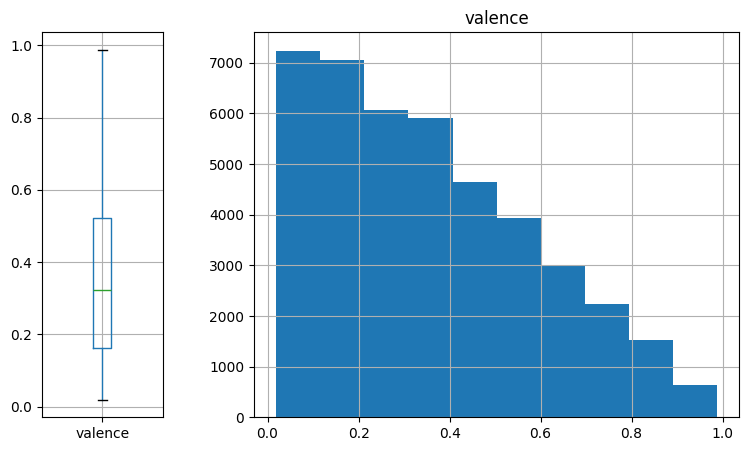

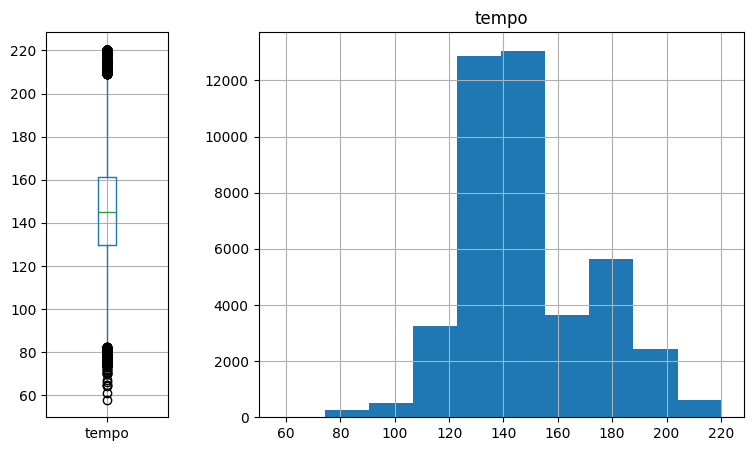

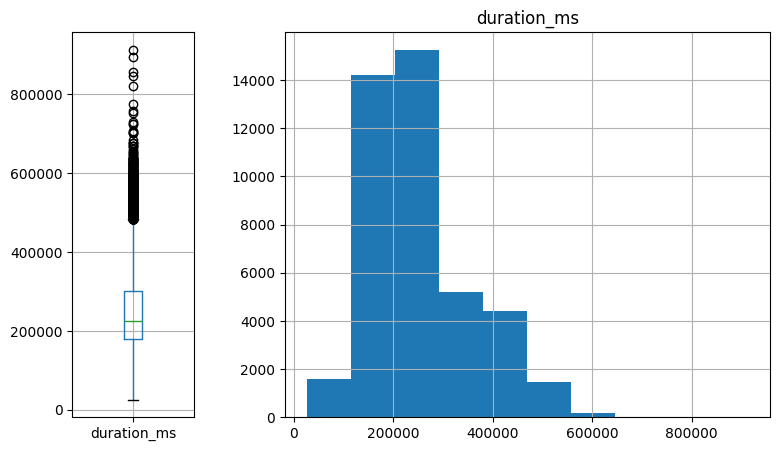

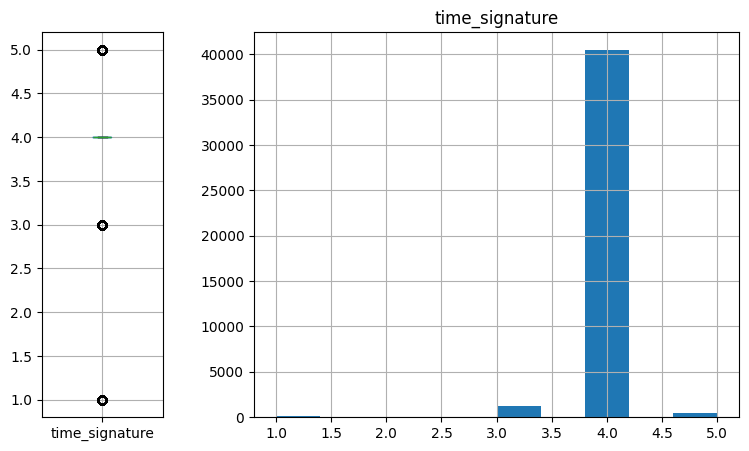

In [136]:
#df.danceability.hist()
for i in range(len(df.columns)-1):
    fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
    df.boxplot(column=df.columns[i],ax=axes[0])
    df.hist(column=df.columns[i], ax=axes[1])

In [137]:
outliers = {}
for column in ["duration_ms","tempo", "loudness", "danceability", "acousticness", "liveness"]:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    Q1, Q3, IQR
    small_outliers = df[column] < (Q1 - 1.5 * IQR)
    
    big_outliers = df[column] > (Q3 + 1.5 * IQR)
    if column in ["duration_ms", "liveness"]:
        big_outliers = df[column] > (Q3 + 2 * IQR)
        
    outliers[column] = small_outliers|big_outliers

    print(column,(sum(small_outliers), sum(big_outliers)))


duration_ms (0, 278)
tempo (173, 359)
loudness (749, 47)
danceability (45, 0)
acousticness (0, 5149)
liveness (0, 1361)


<Axes: >

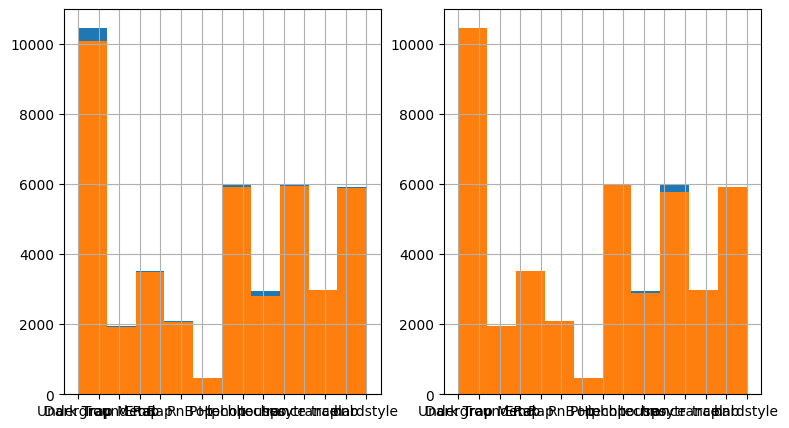

In [138]:

fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 1]}, figsize=(9,5))
df["genre"].hist(ax=axes[0])
df[~outliers["loudness"]]["genre"].hist(ax=axes[0])

df["genre"].hist(ax=axes[1])
df[~outliers["duration_ms"]]["genre"].hist(ax=axes[1])


array([<Axes: title={'center': 'duration_ms'}>], dtype=object)

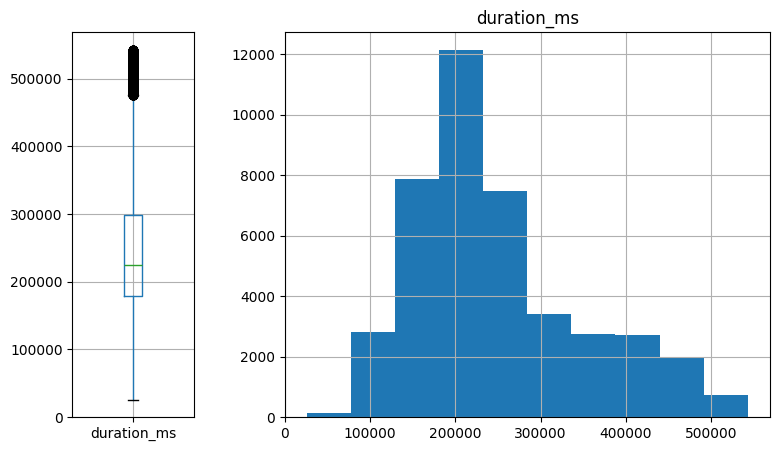

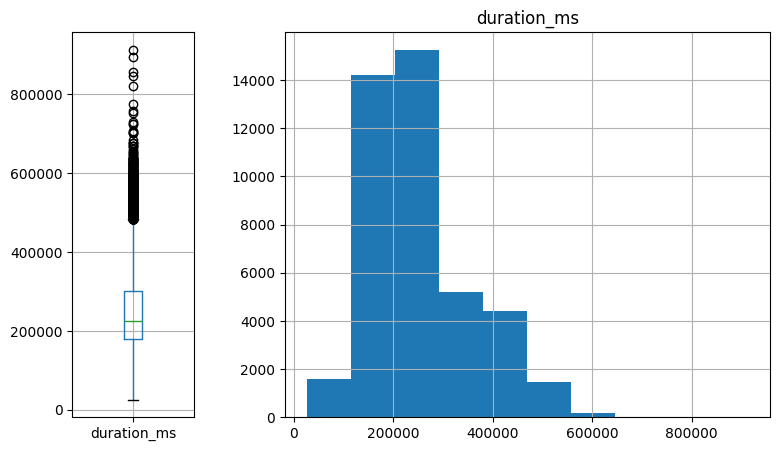

In [139]:

fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
df[~outliers["duration_ms"]].boxplot(column="duration_ms",ax=axes[0])
df[~outliers["duration_ms"]].hist(column="duration_ms", ax=axes[1])
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
df.boxplot(column="duration_ms",ax=axes[0])
df.hist(column="duration_ms", ax=axes[1])

In [140]:
df = df[~outliers["duration_ms"]]

C:\Users\danie\AppData\Local\Temp\ipykernel_7660\1646273792.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[~outliers["liveness"]]["genre"].hist()


<Axes: >

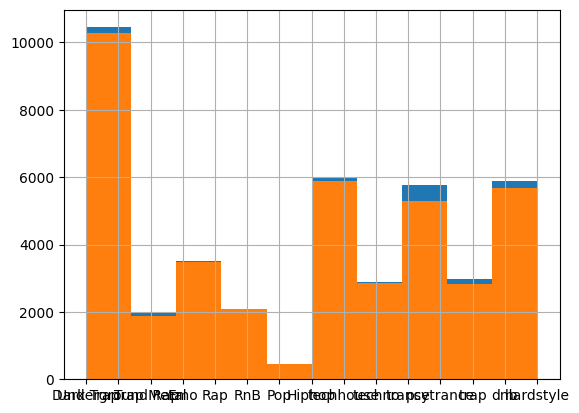

In [141]:
df["genre"].hist()
df[~outliers["liveness"]]["genre"].hist()

<Axes: >

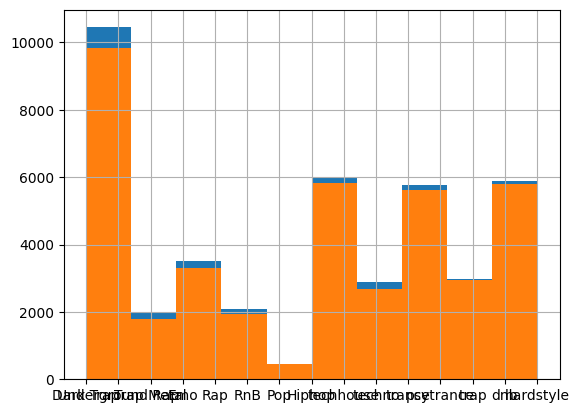

In [142]:
df.time_signature.value_counts()
df["genre"].hist()
df[df.time_signature==4]["genre"].hist()

In [143]:
df = df.drop("time_signature", axis=1)

In [147]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000
mean,0.639381,0.762160,5.367859,-6.453690,0.549456,0.136985,0.096537,0.280115,0.214105,0.357983,147.543354,248622.902396
std,0.156839,0.183960,3.666143,2.938973,0.497554,0.126334,0.171155,0.369640,0.175544,0.233232,23.890219,99418.922413
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000
25%,0.524000,0.631000,1.000000,-8.148000,0.000000,0.049200,0.001760,0.000000,0.099600,0.162000,129.927000,179464.500000
50%,0.646000,0.803000,6.000000,-6.221000,1.000000,0.075900,0.016600,0.005360,0.135000,0.323000,144.983000,224147.000000
75%,0.767000,0.923000,9.000000,-4.502000,1.000000,0.194000,0.107000,0.714000,0.294000,0.523000,161.963000,298074.500000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,543000.000000


In [151]:
scaler = MinMaxScaler()
df[["key", "loudness", "tempo", "duration_ms"]] = scaler.fit_transform(df[["key", "loudness", "tempo", "duration_ms"]])
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000
mean,0.639381,0.762160,0.487987,0.736976,0.549456,0.136985,0.096537,0.280115,0.214105,0.357983,0.551840,0.431045
std,0.156839,0.183960,0.333286,0.080509,0.497554,0.126334,0.171155,0.369640,0.175544,0.233232,0.147177,0.192151
min,0.065100,0.000243,0.000000,0.000000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,0.000000,0.000000
25%,0.524000,0.631000,0.090909,0.690563,0.000000,0.049200,0.001760,0.000000,0.099600,0.162000,0.443314,0.297380
50%,0.646000,0.803000,0.545455,0.743350,1.000000,0.075900,0.016600,0.005360,0.135000,0.323000,0.536067,0.383740
75%,0.767000,0.923000,0.818182,0.790440,1.000000,0.194000,0.107000,0.714000,0.294000,0.523000,0.640673,0.526623
max,0.988000,1.000000,1.000000,1.000000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,1.000000,1.000000


In [144]:
df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
genre                object
dtype: object

In [145]:

df = df.join(pd.get_dummies(df["genre"]))



In [152]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000
mean,0.639381,0.762160,0.487987,0.736976,0.549456,0.136985,0.096537,0.280115,0.214105,0.357983,0.551840,0.431045
std,0.156839,0.183960,0.333286,0.080509,0.497554,0.126334,0.171155,0.369640,0.175544,0.233232,0.147177,0.192151
min,0.065100,0.000243,0.000000,0.000000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,0.000000,0.000000
25%,0.524000,0.631000,0.090909,0.690563,0.000000,0.049200,0.001760,0.000000,0.099600,0.162000,0.443314,0.297380
50%,0.646000,0.803000,0.545455,0.743350,1.000000,0.075900,0.016600,0.005360,0.135000,0.323000,0.536067,0.383740
75%,0.767000,0.923000,0.818182,0.790440,1.000000,0.194000,0.107000,0.714000,0.294000,0.523000,0.640673,0.526623
max,0.988000,1.000000,1.000000,1.000000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,1.000000,1.000000


In [159]:
np.random.seed(144)
features = df.columns[0:12]
genres = df.columns[13:-1]
print(features)
print(genres)
df_shuffled = df.sample(frac=1).reset_index(drop=True)

data = df_shuffled[features]
genre = df_shuffled["genre"]
genre_one_hot = df_shuffled[genres]
data.to_csv("../data/features.csv")
genre.to_csv("../data/genre.csv")
genre_one_hot.to_csv("../data/genre_one_hot.csv")



Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')
Index(['Dark Trap', 'Emo', 'Hiphop', 'Pop', 'Rap', 'RnB', 'Trap Metal',
       'Underground Rap', 'dnb', 'hardstyle', 'psytrance', 'techhouse',
       'techno', 'trance'],
      dtype='object')
